In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [7]:
df['target']=iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df.shape

(150, 5)

In [10]:
df['flowername']=df.target.apply(lambda x:iris.target_names[x])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [11]:
df0=df[:50]
df1=df[51:100]
df2=df[100:]

Text(0, 0.5, 'sepal width')

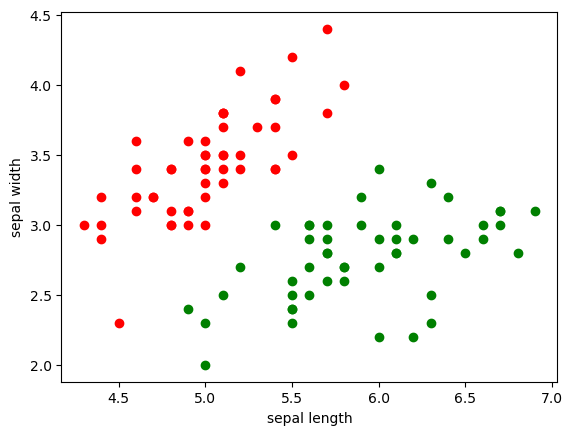

In [12]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

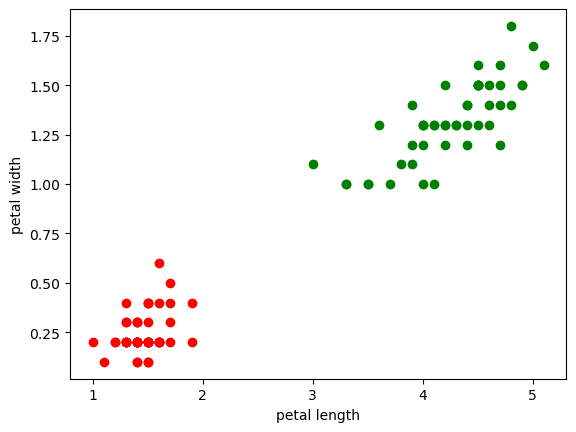

In [13]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)']=scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)']=scaler.transform(df[['sepal width (cm)']])
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])

In [17]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
0,0.222222,0.625,0.067797,0.041667,0,setosa


In [18]:
df0=df[:50]
df1=df[51:100]
df2=df[100:]

In [19]:
df0.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa


Text(0, 0.5, 'sepal width')

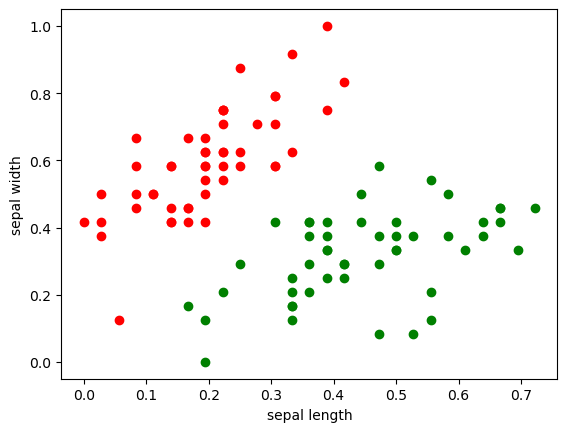

In [20]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

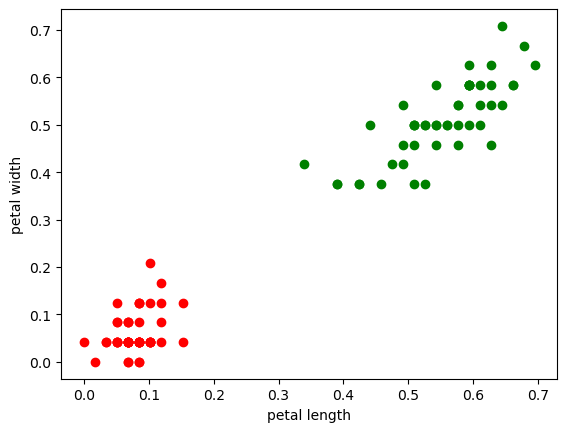

In [21]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [23]:
x=df.drop(['target','flowername'],axis='columns')
y=df['target']

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [29]:
kn.score(xtest,ytest)

1.0

In [30]:
y_predict=kn.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predict)

<Axes: >

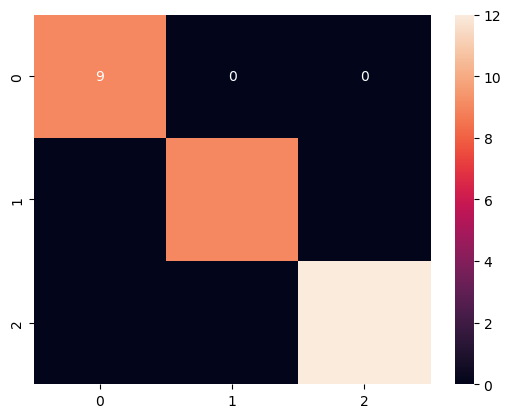

In [31]:
import seaborn as sns
plt.xlabel('ypredict')
plt.ylabel('ytest')
sns.heatmap(cm,annot=True)

In [32]:
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,y_predict)

In [37]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

